# Ford GoBike System Data
## by Amr Yasser
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from math import sin, cos, sqrt, atan2, radians

%matplotlib inline

In [4]:
FILE_NAME = '201902-fordgobike-tripdata.csv'
df = pd.read_csv(FILE_NAME)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Preliminary Exploration

In [5]:
print('Shape: {}'.format(df.shape))
print ('\n')
print(df.dtypes)

Shape: (183412, 16)


duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [9]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [10]:
df.start_station_name.value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

### Notes for wrangling
- <span style="color:blue">Reading distance from latitude and longitude is not intutive</span>  
- <span style="color:blue">Some columns are not needed in the analysis (latitude, longitude, station id)</span>  
- <span style="color:blue">Columns types are not useful (time)</span>
- <span style="color:blue">Some null values(station data, user data)</span>



### Wrangling

**1. Convert Lat and Long to distances**


In [11]:
# function to take lat and long and convert them into meters
# code from stackoverflow, user: Michael0x2a
# https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

def geo_to_dis(lat1, lon1, lat2, lon2):
    """ Transform a geodetic coordinates between two points to a distance in meters
    
    Keyword arguments:
    lat1 (float): latitude of the first point
    lon1 (float): longitude of the first point
    lat2 (float): latitude of the second point
    lon2 (float): longitude of the second point
    
    Returns:
    distance (float): the distance between the two points in meters
    """
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c * 1000

    return distance

In [12]:
df['distance_m'] = df.apply(lambda x: geo_to_dis(x['start_station_latitude'],
                            x['start_station_longitude'],
                            x['end_station_latitude'],
                            x['end_station_longitude']), axis=1)

In [13]:
# testing
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_m
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,544.879500
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,1743.546304
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2705.394149
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,260.820396
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2410.057750


**2. Remove unnecessery columns**

In [14]:
remove_columns = ['start_station_id', 'start_station_latitude', 'start_station_longitude',
                   'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_id',
                   'bike_share_for_all_trip']

In [15]:
df.drop(columns=remove_columns, inplace=True, errors='ignore')
df.head(2)

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,distance_m
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,544.879500
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,NaN,1743.546304


**3. Change Column Typpes**

In [16]:
df.dtypes

duration_sec            int64
start_time             object
end_time               object
start_station_name     object
end_station_name       object
user_type              object
member_birth_year     float64
member_gender          object
distance_m            float64
dtype: object

In [17]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [18]:
df.dtypes

duration_sec                   int64
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_name            object
end_station_name              object
user_type                     object
member_birth_year            float64
member_gender                 object
distance_m                   float64
dtype: object

**4. Drop null values**  
null values compromise less than 5% of the data, it's safe to drop them

In [19]:
df.isna().sum()

duration_sec             0
start_time               0
end_time                 0
start_station_name     197
end_station_name       197
user_type                0
member_birth_year     8265
member_gender         8265
distance_m               0
dtype: int64

In [20]:
df.shape[0]

183412

In [21]:
# what percentage are the rows with nulls compared to the overall dataframe
100*(8265+197)/183412

4.613656685494951

In [22]:
# less than 5% of the dataframe contain nulls, small percentage and can be removed safely
df.dropna(inplace=True)

In [23]:
df.isna().sum()

duration_sec          0
start_time            0
end_time              0
start_station_name    0
end_station_name      0
user_type             0
member_birth_year     0
member_gender         0
distance_m            0
dtype: int64

In [24]:
df.shape[0]

174952

### What is the structure of your dataset?
There are 174952 trips in the dataset, with their associated information for 
- Trip start and end location (by station name)
- Trip distance in meters
- Trip start and end time stamp and total duration in seconds
- User gender (Male, Female or Other)
- User birth year
- Service type (Subscriber or Customer)

### What are the main features of interest in your dataset?
What affect the trip duration and trip distance the most
- Timing in day
- Gender
- Service Type

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

It's trivial that distance would affect the trip duration the most. Also, most likely gender and trip starting hour will affect the duration and the speed more than rest of the variables, I expect that most trips will be by males and generally longer trips and faster than females, and the starting hour affects the number of trips and speed if it's in the morning, but might be longer in the evening.

## Univariate Exploration

### What's The Duration Distribution
How's is the trip duration distributed, and what's the most common trip duration ?

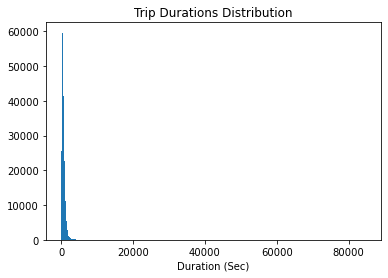

In [25]:
# plotting a hist for the duration with bin size 250 sec
bin_size = 250
bins_edges = np.arange(0, df['duration_sec'].max()+bin_size, bin_size)
plt.hist(data = df, x = 'duration_sec', bins=bins_edges)
plt.title('Trip Durations Distribution')
plt.xlabel('Duration (Sec)')
plt.show()

- Some points on the far end distort the graph
- Plot in log scale

In [26]:
# getting log10 for min and max duration, to help identifying bin edges
print('min log: {:1.2f}\nmax log: {:1.2f}'.format(np.log10(df.duration_sec.min()), np.log10(df.duration_sec.max())))

min log: 1.79
max log: 4.93


In [27]:
# bin size and edges for the log scale hist
bin_size = 0.05
bins_log = np.arange(1.5, 5+bin_size, bin_size)

# X-axe tick in log scale and values in seconds
x_values = [60, 200, 500, 1000, 3000, 9000, 18000, 60000]
x_ticks = x_values

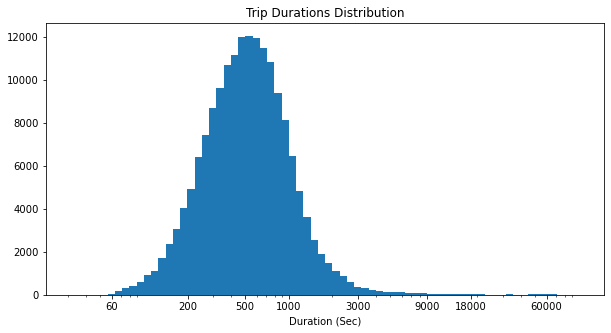

In [28]:
# Changing scale to log to better vissualize the hist
plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'duration_sec', bins = 10 ** bins_log)
plt.xscale('log')
plt.xticks(x_ticks, x_values)
plt.title('Trip Durations Distribution')
plt.xlabel('Duration (Sec)')
plt.show()

**Observation:**  
The duration follows a clear uniform distribution on the log scale, with some extreme outliers on the right side.  
Most of the trips made take around 500 seconds (~8 minutes)  
Very few trip taken take more than 18000 seconds (300 minutes).

### What's The Distance Distribution
How's is the trip distance distributed, and what's the most common trip distance ?

In [29]:
# members who rode for more than 20 k.m
df[df.distance_m>20000]

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,distance_m
112038,6945,2019-02-12 14:28:44.402,2019-02-12 16:24:30.158,Montgomery St BART Station (Market St at 2nd St),Palm St at Willow St,Subscriber,1985.0,Female,69491.048637


In [30]:
# One female cycled for almost 70 k.m, which is way off the rest of the users distance.
# since it's only 1 row, it will be droped
df = df[df.distance_m<20000]

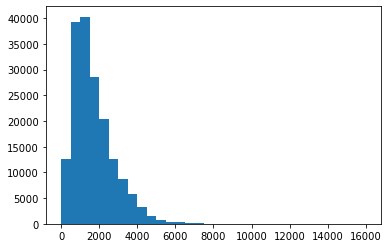

In [31]:
bin_edges = np.arange(0, df.distance_m.max()+500, 500)
plt.hist(data=df, x='distance_m', bins = bin_edges);

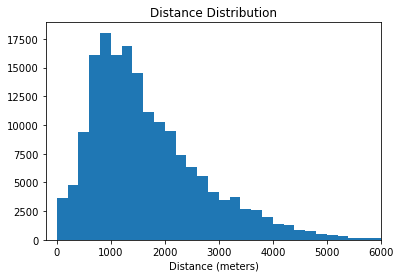

In [32]:
# focusing only on 6000 meters distance, as longer than that has very few data and not valuable in analysis
bin_edges = np.arange(0, df.distance_m.max()+200, 200)
plt.hist(data=df, x='distance_m', bins = bin_edges);
plt.xlim(-200,6000);
plt.title('Distance Distribution')
plt.xlabel('Distance (meters)')
plt.show()

**Observation:**  
distance follow a unimodel distribution with a peak around the 800 meters.  
Most of the data are below 6000 meter. 

### What's The Trip Starting Hour Distribution
Is there's any clear peaks in the trip starting hour ?  
Is there's any dead zones in the graph ?

In [33]:
# extracting the starting and ending hour from the column start_time
df['start_hour'] = df.apply(lambda x: x.start_time.hour, axis=1)
df['end_hour'] = df.apply(lambda x: x.end_time.hour, axis=1)

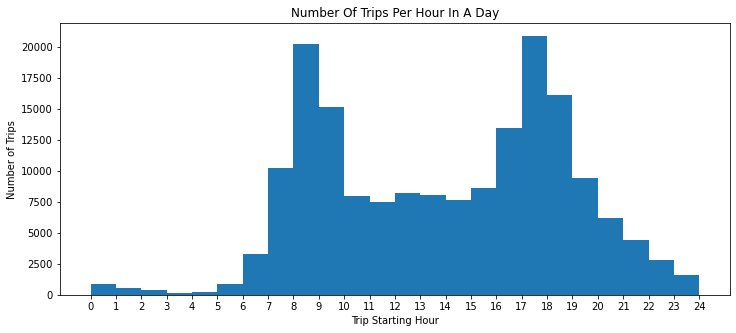

In [34]:
# plotting a hist for the starting hour
plt.figure(figsize=(12,5))
bin_edges = np.arange(0, 25, 1)
plt.hist(x=df['start_hour'], bins=bin_edges)
plt.xlabel('Trip Starting Hour')
plt.xticks(bin_edges)
plt.ylabel('Number of Trips')
plt.title('Number Of Trips Per Hour In A Day')
plt.show()

**Observation:**  
Starting hour takes a bimodel distribution with two clear peaks around the 8 O'cloc and 17 O'cloc (5 pm)  
Before the first peak the slope is very steep starting from 4 O'clock.  
After the second peake a moderate decresing slope ends at 2 O'clock, with a very few number of trips between 2 O'clock and 4 O'clock

### What's The Percent of Gender and User Type
Is there's any clear dominant gender in the data ?  
What's the percent of users compared to customers ?

In [35]:
# getting genders and their percentages of the overall
sorted_genders = df.member_gender.value_counts()
genders = [x for x in sorted_genders.index]
percentages = [x * 100/ df.member_gender.count() for x in sorted_genders.values]
# generating labels from the genders and %
gen_labels = ['{}: {:1.1f}%'.format(x, y) for (x, y) in zip(genders, percentages)]

In [36]:
# getting types and their percentages of the overall
types_values = df.user_type.value_counts()
types = [x for x in types_values.index]
percentages = [x * 100/ df.user_type.count() for x in types_values.values]
# generating labels from the types and %
typ_labels = ['{}: {:1.1f}%'.format(x, y) for (x, y) in zip(types, percentages)]

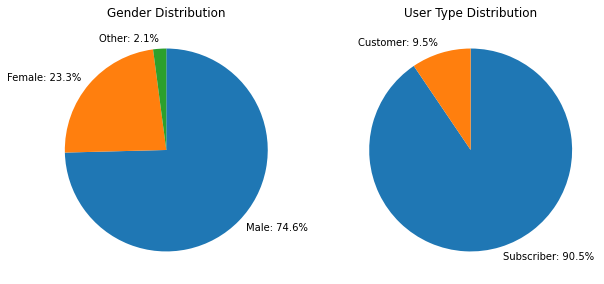

In [37]:
# plot a pie chart for genders
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(df.member_gender.value_counts(), labels=gen_labels, startangle=90, counterclock=False)
plt.title('Gender Distribution')

plt.subplot(1,2,2)
# plot a pie chart for genders
plt.pie(df.user_type.value_counts(), labels=typ_labels, startangle=90, counterclock=False)
plt.title('User Type Distribution')
plt.show()

**Observation:**  
The graph shows that almost 75% of trips are made by males.  
About 23% of the trips are made by females.  
And the rest 2% are made by other genders.

More tha 90% of the users are subscribers, and less than 10% are customers

### What's The Age Distribution
What's the most common age of users ?  
Are all the different ages close in number of trips or does it vary alot ?

In [38]:
df['age'] = 2019 - df.member_birth_year

In [39]:
df.age.describe()

count    174951.000000
mean         34.196867
std          10.118760
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

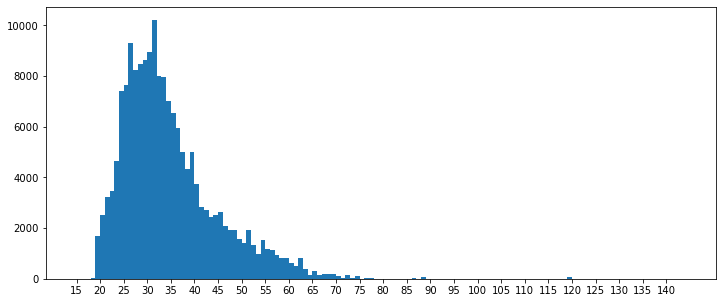

In [40]:
bin_age = np.arange(15, 145, 1)
x_ticks = np.arange(15, 145, 5)
plt.figure(figsize=(12,5))
plt.hist(x=df.age, bins=bin_age);
plt.xticks(x_ticks);

Age larger than 80 is most likely an input error, so we focus only on age less than 80 years

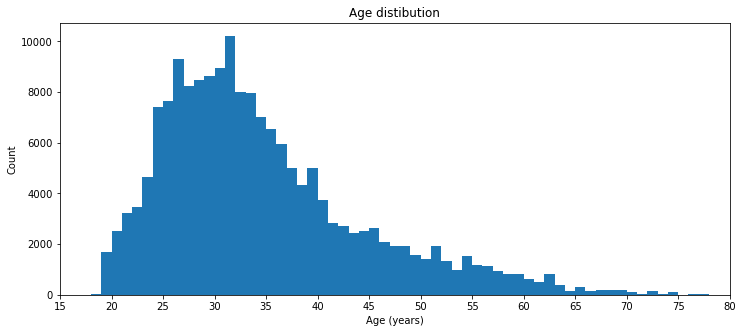

In [41]:
plt.figure(figsize=(12,5))
plt.hist(x=df.age, bins=bin_age);
plt.xticks(x_ticks);
plt.xlim(15,80);
plt.title('Age distibution');
plt.xlabel('Age (years)');
plt.ylabel('Count');

In [42]:
df = df[df.age<80]

**Observation:**  
Most trips are made by users aged 32 and 27 year old.  
Very few users are above 65 years, or below 20 years.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The graphs confirm some of the initial expectations that
>- Most trips take less than 10 minutes  
>- Most trips are made by males  
>- Most trips are made by subscribers    
  
>Also the graphs show new findings like:
>- Most trips are made on the start and end of working hours (8:00 am and 5:00 pm)
>- most users are 37 and 27 years old, with very few users under 20 or above 60.
>- The trip duration graph had some extreme outliers when ploted, but when using the log scale for plotting the data follow a uniform distribution  
>- Most trips are less than 1 K.M


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>- To graph the trip starting hour, another column is added to the dataframe with the starting hour extracted from the start_time column
>- To graph the age distribution, another column is added to the dataframe with the age extracted from the member_birth_year column, and after plotting the histogram some data appears to be more than 80 years old, but very few data and most likely they are input error, so age > 80 are all dropped
>-One extreme distance was found (>60000 meters), and this row is dropped from the dataframe

## Bivariate Exploration

### Is there's any clear correlation between the numeric variables

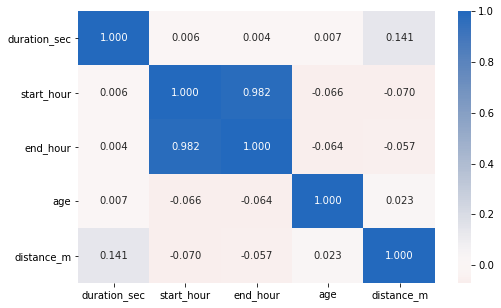

In [43]:
# correlation plot
num_columns = ['duration_sec', 'start_hour', 'end_hour', 'age', 'distance_m']
plt.figure(figsize = [8, 5])
sb.heatmap(df[num_columns].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

**Observation:**  
No clear correlation between the numeric values except the obvious start and end hour  

### How Does Age Correlate to Duration
Does older people take shorter trips, and who takes the longest trips ?

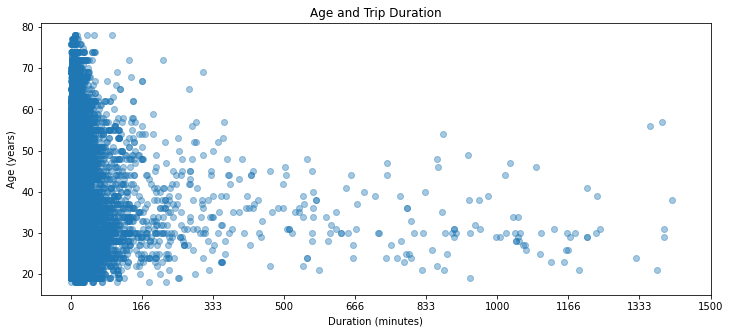

In [44]:
duration_ticks = np.arange(0, df.duration_sec.max() + 10000, 10000)
duration_labels = [int(i) for i in (duration_ticks / 60)]
plt.figure(figsize=(12,5))
plt.scatter(data=df, y='age', x='duration_sec', alpha=0.4);
plt.title('Age and Trip Duration');
plt.ylabel('Age (years)');
plt.xlabel('Duration (minutes)');
plt.xticks(duration_ticks, duration_labels);

**Observation:**  
Most of the long trips with duration > 400 minutes are made by people under 55.  
Except for a couple of points, all trips taking more than 1000 minutes are by people between 20 and 45 years old.

### How Does Age Correlate to Distance
Who takes the longest trips ?

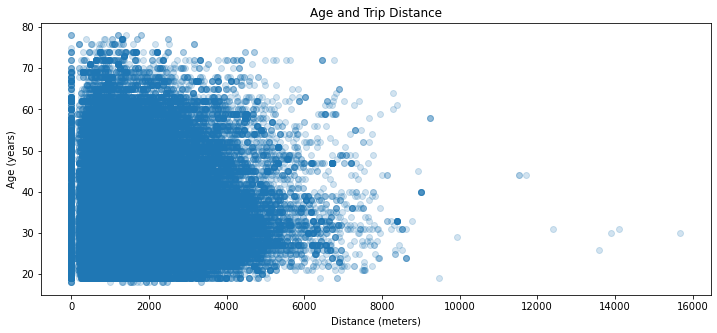

In [45]:
plt.figure(figsize=(12,5))
plt.scatter(data=df, y='age', x='distance_m', alpha=0.2);
plt.title('Age and Trip Distance');
plt.ylabel('Age (years)');
plt.xlabel('Distance (meters)');

**Observation:**  
Most of the data are concentrated under 10,000 meters  
All the trips which are longer than 12,000 meters are made by users between 25 and 30 years old

### Does Certain Age Groups Have A Preferred Starting Hour

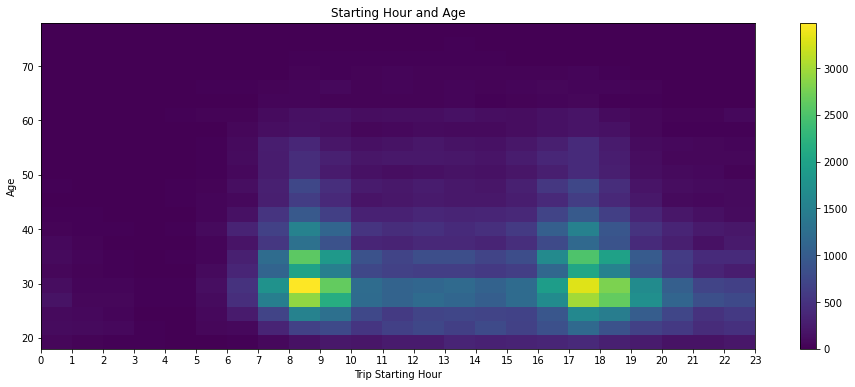

In [46]:
x_ticks = np.arange(0, 24, 1)
plt.figure(figsize=(16,6))
plt.hist2d(data = df, x = 'start_hour', y = 'age', bins=23);
plt.colorbar();
plt.xticks(x_ticks, x_ticks);
plt.xlabel('Trip Starting Hour');
plt.ylabel('Age');
plt.title('Starting Hour and Age');

**Observation:**  
Most trips taken on the start and end of the work day (8 a.m and 5 p.m) are made by 30 years old users.  
People in their early 20s have no clear prefrence for the trip timing.

### Does Gender Have Any Effect On Trip Duration

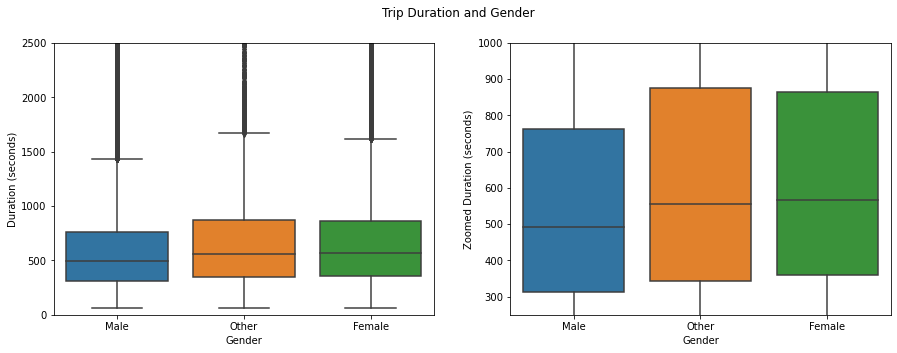

In [47]:
plt.figure(figsize = [15, 5])
plt.subplot(1,2,1)
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec')
plt.ylabel('Duration (seconds)')
plt.xlabel('Gender')
plt.ylim(0,2500)

plt.subplot(1,2,2)
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec')
plt.xlabel('Gender')
plt.ylabel('Zoomed Duration (seconds)')
plt.ylim(250,1000)
plt.suptitle('Trip Duration and Gender')

plt.show()

In [48]:
print ('Medians:\n-Males: {}\n-Females: {}\n-Others: {}'.format(df[df.member_gender=='Male']['duration_sec'].median(), 
                                                   df[df.member_gender=='Female']['duration_sec'].median(), 
                                                   df[df.member_gender=='Other']['duration_sec'].median()))

Medians:
-Males: 493.0
-Females: 568.0
-Others: 555.0


In [49]:
print ('Mean:\n-Males: {}\n-Females: {}\n-Others: {}'.format(df[df.member_gender=='Male']['duration_sec'].mean(), 
                                                   df[df.member_gender=='Female']['duration_sec'].mean(), 
                                                   df[df.member_gender=='Other']['duration_sec'].mean()))

Mean:
-Males: 672.6935783335891
-Females: 778.9927386910018
-Others: 997.5666849615807


**Observation:**  
The first graph shows that the 3 genders common trip durations are close with a lot of outliers.  
After zooming in on the Y-axe (duration) to increase the readability, we can see that males tend to have shorter  duration by a small margin.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
>- Age has a clear corelation with trip duration, most of the long trips (duration > 300 minutes) are made by people under 58
>- Also age has a clear effect on the trip starting hour, most trips taken on the start and end of the work day (8 a.m and 5 p.m) are made by 30 years old users, while users in early 20s have no clear prefrence for the trip timing.
>- Gender doesn't have a strong effect on trip duration as expected, Males tend to have shorter trips, but this is very small margin and could be due to the amount of data available foe males is a lot more than data about other genders.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
>- Duration median for the 3 genders are very close, but averages vary a lot
>- Not a relation but an observation about the age, all the data are for people above 19 years old

## Multivariate Exploration

### How Does Duration And Distance Varry Between Different Genders 

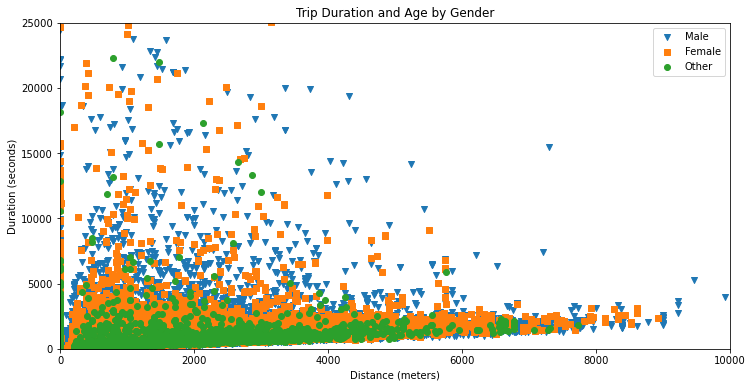

In [50]:
mark_gender = [['Male', 'v'],['Female', 's'],['Other', 'o']]
plt.figure(figsize=(12,6))
for gender, marker in mark_gender:
    df_gender = df[df.member_gender == gender]
    plt.scatter((df_gender.distance_m), df_gender.duration_sec, marker = marker, alpha= 1)
plt.legend(['Male','Female','Other'])
plt.title('Trip Duration and Age by Gender')
plt.xlabel('Distance (meters)')
plt.ylabel('Duration (seconds)')
plt.ylim(0,25000)
plt.xlim(0,10000)
plt.show()

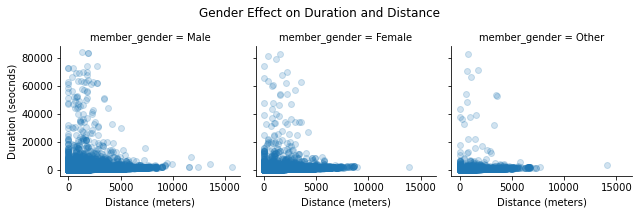

In [51]:
g = sb.FacetGrid(data=df, col='member_gender', sharex=True, sharey=True, 
                 col_order=['Male', 'Female', 'Other']);
g.map(plt.scatter, 'distance_m', 'duration_sec', alpha=0.2);
g.set_axis_labels('Distance (meters)', 'Duration (seocnds)');
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Gender Effect on Duration and Distance')
plt.show()

**Observation:**  
Overall trip duration and distance are very close when comparing by gender.  
Only when ignoring the most extreme point in each gender, males tend to have longer distance trips compared to the rest.  

### In Each Gender, How Does The User Type Affect The Duration

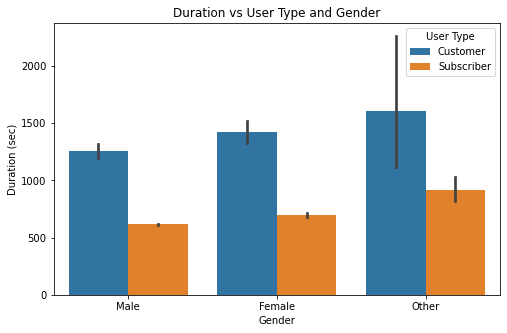

In [52]:
plt.figure(figsize=(8,5))
sb.barplot(data=df, x='member_gender', y='duration_sec', hue='user_type', order=['Male', 'Female', 'Other'])
plt.title('Duration vs User Type and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.legend(title='User Type')
plt.show()

**Observation:**  
When further studying the duration after the previous scatter plot, in this graph we can see that other genders have average longer duration than males and females, which was not clear from the scatter plot due to a lot of variation in the data (large deviations) 
Generally all subscribers have shorter average duration than customers

### In Each Gender, How Does The User Type Affect The Distance

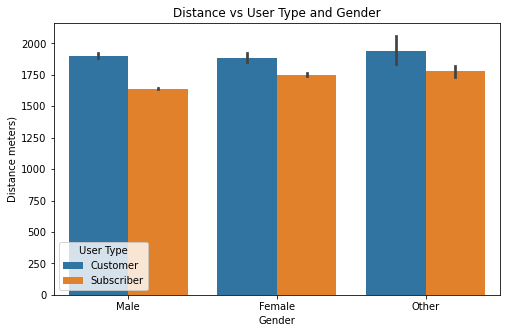

In [53]:
plt.figure(figsize=(8,5))
sb.barplot(data=df, x='member_gender', y='distance_m', hue='user_type', order=['Male', 'Female', 'Other'])
plt.title('Distance vs User Type and Gender')
plt.xlabel('Gender')
plt.ylabel('Distance meters)')
plt.legend(title='User Type')
plt.show()

**Observation:**  
As expected from the previous scatter plot, Gender have no clear winner when comparing distances.  
Mostly all customers have longer trips than subscribers

### In Which Gender Does Age Affect The Trip Distance Most
Is the change in average distance between age groups the same when comparing different genders ?   
Does distance peaks at the same age between the different genders ?

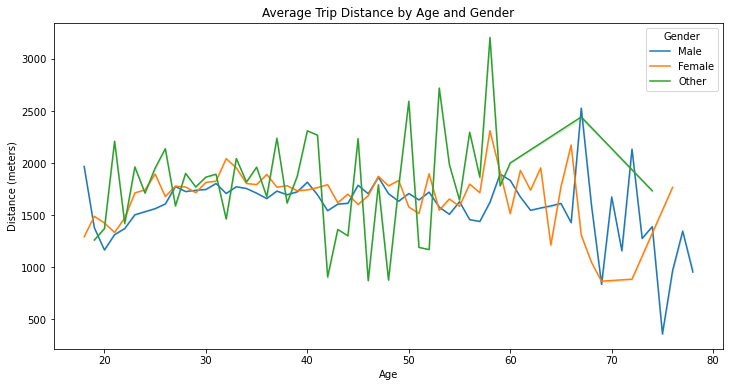

In [58]:
plt.figure(figsize=(12,6))
sb.lineplot(y=df.distance_m, x=df.age, hue=df.member_gender, hue_order=['Male', 'Female', 'Other'], ci=0)
plt.title('Average Trip Distance by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Distance (meters)')
plt.legend(title='Gender')
plt.show()

**Observation:**  
Overall, other genders tend to have more deviations in trip distances, with a peak around 58 years old.
Males and females around 67 years old have longer trips than the rest of their kind.

### In Which Gender Does Age Affect The Trip Duration Most
Is the change in average duration between age groups the same when comparing different genders ?   
Does duration peaks at the same age between the different genders ?

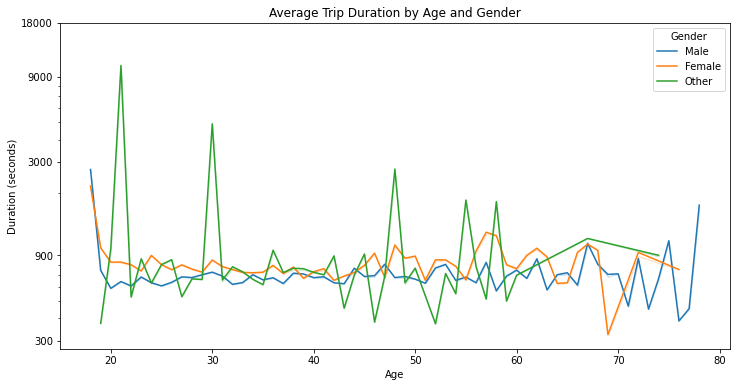

In [57]:
dur_values = [300, 900, 3000, 9000, 18000]
dur_ticks = np.log10(x_values)

plt.figure(figsize=(12,6))
sb.lineplot(data=df, x='age', y='duration_sec', hue='member_gender', hue_order=['Male', 'Female', 'Other'], ci=0)
plt.yscale('log')
plt.yticks(dur_values, dur_values)
plt.title('Average Trip Duration by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Duration (seconds)')
plt.legend(title='Gender')
plt.show()

**Observation:**  
Same as distance, other genders tend to have the most variation in trip duration between different age groups.  
Males and females have closer change, the both peak in older ages (67 and 58 respectively), while other gender have the longest trip duration with 21 years old users.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- From the scatter diagram the points show trip duration and distance are very close when comparing males and females, by a small margin the other genders tend to have lower trip duration and shorter distance
- But when looking deeper into the mean duration from the box plot, customers from the other gender have average longer duration than all other users, while generally all subscribers have shorter average duration than customers.
- Also from the box plot, gender doesn't affect the trip distance, but on average customers have longer trips than subscribers.
- Age corelation with distance and duration is not clear, but what's certain is that the other genders have the most changes in averages between different ages.

### Were there any interesting or surprising interactions between features?

>- From the bivariate exploration we found that the median duration for all genders are close, but after further exploring, other genders and subscribers actually have higher average trip duration.  
>- From the age and duration graph (bivariate section), the longer trips are made by people under 58 years old, but  the average trip duration by age and gender graph (multivariate section) shows that on average longer trips are made by users between 58 and 68. This could be due to the other gender younger people are deriving the overall mean for the duration and a lot of deviation exist in the data.